# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Understanding Dataset_____________________________________________

# Loading Dataset

In [13]:
data = pd.read_csv(r"C:\Users\USER\Desktop\CSE299\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Shape of the Dataset

In [14]:
data.shape

(768, 9)

# Dataset columns

In [16]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Checking Unique Values

In [18]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# Dataset description 

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Missing data checking

<AxesSubplot:>

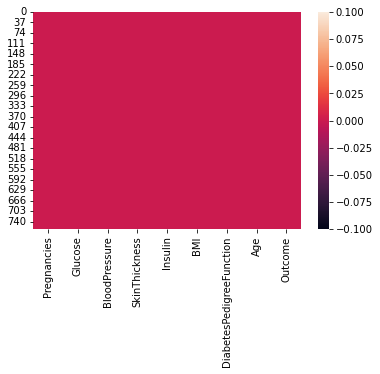

In [3]:
sns.heatmap(data.isnull())

# Checking for Null Values

In [27]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


# Check List of null vaules (No null values found)

In [24]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Cleaning_____________________________________________________

# Dropping off redundant data (Pregnancies,Age)

In [55]:
diabetes = data.drop(['Pregnancies','Age'], axis=1)

In [56]:
diabetes.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,72,35,0,33.6,0.627,1
1,85,66,29,0,26.6,0.351,0
2,183,64,0,0,23.3,0.672,1
3,89,66,23,94,28.1,0.167,0
4,137,40,35,168,43.1,2.288,1


In [57]:
diabetes.tail()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
763,101,76,48,180,32.9,0.171,0
764,122,70,27,0,36.8,0.340,0
765,121,72,23,112,26.2,0.245,0
766,126,60,0,0,30.1,0.349,1
767,93,70,31,0,30.4,0.315,0


# Training Test Split

In [101]:
X=diabetes.drop("Outcome", axis=1)
Y=diabetes['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
653,120,54,0,0,26.8,0.455
753,181,88,44,510,43.3,0.222
106,96,122,0,0,22.4,0.207
735,95,60,32,0,35.4,0.284
560,125,76,0,0,33.8,0.121
...,...,...,...,...,...,...
390,100,66,29,196,32.0,0.444
396,96,56,34,115,24.7,0.944
487,173,78,32,265,46.5,1.159
728,175,88,0,0,22.9,0.326


# RELATIONSHIP ANALYSIS__________________________________________

# Matrix Co-relation

In [102]:
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

# Clear Look of Matrix Co-relation by Heatmap

<AxesSubplot:>

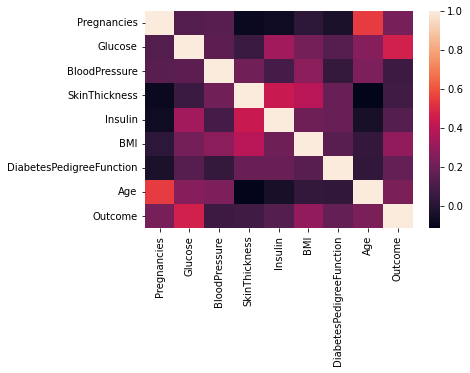

In [103]:
sns.heatmap(correlation)

# Matrix Co-relationship Heatmap after dropping redundant columns

<AxesSubplot:>

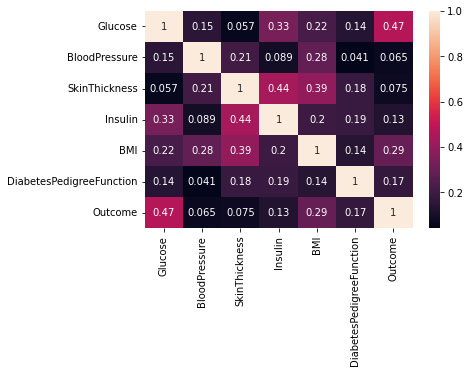

In [104]:
Corelation = diabetes.corr()
sns.heatmap(Corelation, xticklabels = Corelation.columns, yticklabels = Corelation.columns, annot = True)

# Pairplot relationships between each two variables of dataset

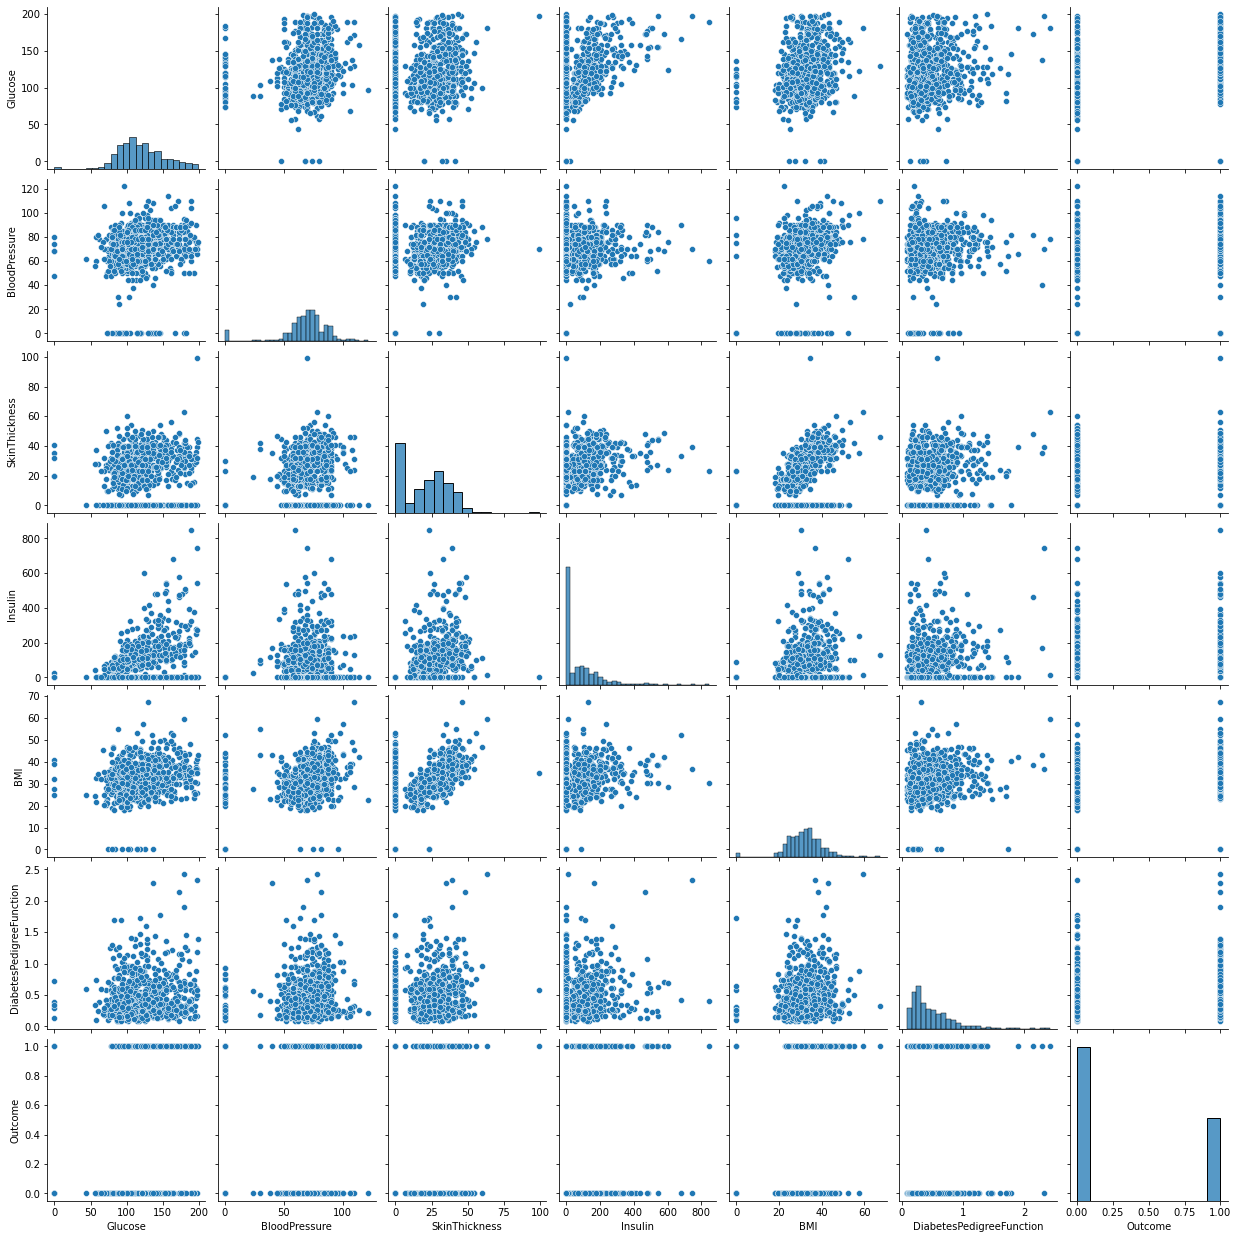

In [105]:
sns.pairplot(diabetes)

# Scatter Plot relationship between Outcome & it's two important variables (Glucose,BMI)

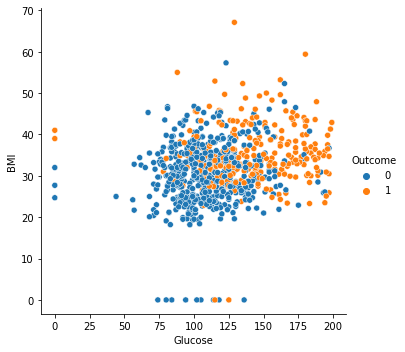

In [106]:
sns.relplot( x = 'Glucose', y = 'BMI', hue = 'Outcome', data = diabetes)

# Histograms

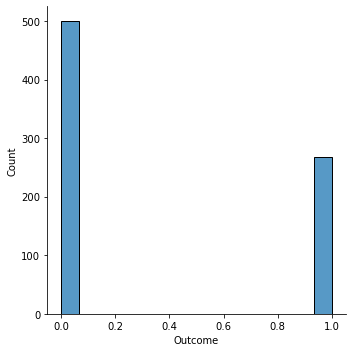

In [107]:
sns.displot(diabetes['Outcome'], bins=15)

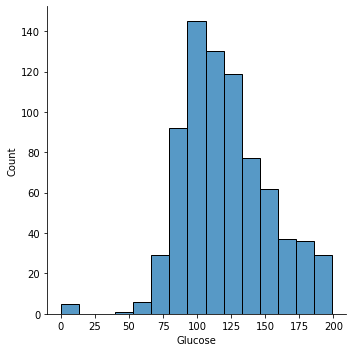

In [108]:
sns.displot(diabetes['Glucose'], bins=15)

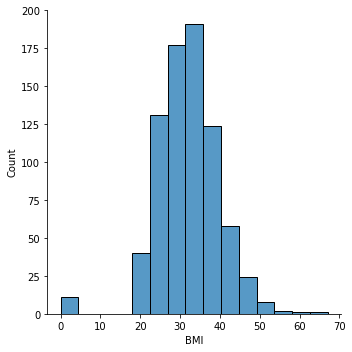

In [109]:
sns.displot(diabetes['BMI'], bins=15)

# Catplot Realtionship

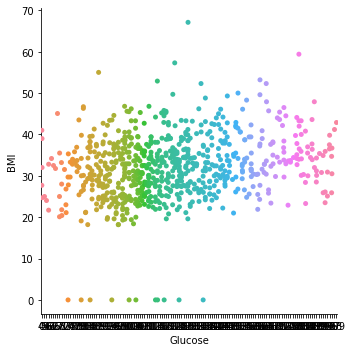

In [110]:
sns.catplot(x='Glucose', y ='BMI', data=diabetes)

# Model Training

In [111]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

# Prediction 

In [112]:
predictions = model.predict(X_test)
print(predictions)

[0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 1]


In [113]:
accuracy = accuracy_score(predictions, Y_test)
print(accuracy)

0.8051948051948052
